In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import  RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score
from RFBDoSBC.GetAndPrepareData import *
from RFBDoSBC.modelPreparation import *
from RFBDoSBC.modelEvaluation import *
from RFBDoSBC.plotData import *
from RFBDoSBC.utility import *


In [13]:
R = [0.2, 0.3, 0.4, 0.5, 0.6]
pThardmin = [10,20,30,40]
rad = R[0]
ptm = pThardmin[0]

In [14]:
msg("Analyzing jets with R=%1.1f and p_T hardmin=%d"%(rad, ptm))


JEB: Analyzing jets with R=0.2 and p_T hardmin=10


In [15]:
best_params = loadBestParameters(rad, ptm)
rfModel = makeRandomForest(best_params)
batch_num = 0
feat_imp = {}

In [16]:
batch_num+=1
dataGen = DataPipelineBatch(f"Analysis_Code/Generator Output/merged-ML-output-LOWSTATS-Rparam-{rad}-pThardmin-{ptm}.0.csv", ptm)
train, test = next(dataGen)

In [17]:
X, Y = split_feat_label(train)
Xtest, Ytest = split_feat_label(test)

In [18]:
doDataExploration(X, Y, train, rad, ptm, batch_num)

JEB: Number of Features: 5
JEB: Number of Fake Jets: 2815
JEB: Number of Squishy Jets: 2832
JEB: Number of Real Jets: 2853
JEB:               Area      Epsilon     p_T-corr   Angularity     Mean-p_T  \
count  8500.000000  8500.000000  8500.000000  8500.000000  8500.000000   
mean      0.108318   250.083298     5.080721     0.119646     0.615735   
std       0.023238    62.396633     7.400513     0.013336     0.129691   
min       0.032075    96.591301   -13.044100     0.065127     0.317032   
25%       0.093218   203.123993    -0.485410     0.110948     0.520795   
50%       0.120281   244.296997     3.621240     0.120501     0.602208   
75%       0.126295   291.363998     9.569370     0.128815     0.688232   
max       0.148347   498.621002    34.442200     0.175606     1.043130   

             X_tru   pythia-mom        Label  
count  8500.000000  8500.000000  8500.000000  
mean      0.090145     4.552121     2.004471  
std       0.120392     6.105133     0.816628  
min       0.00000

In [19]:
rfModel = doRandomForestFit(X, Y, rfModel, batch_num)

JEB: Fitting to data for batch 1.


In [20]:
oracle = doOracleFit(X, rfModel, rad, ptm)

JEB: Initializing Oracle and fitting to rfModel's predictions
[3]


JEB: Computing feature importances and other model statistics.
JEB: Feature rankings:
1. Mean-p_T (0.261190)
2. p_T-corr (0.250142)
3. Epsilon (0.221846)
4. Area (0.196350)
5. Angularity (0.070472)
JEB: Plotting feature importances.
JEB: Plot distribution of importances.
JEB: Computing performance metrics
[3 3 3 ... 3 3 3]
2853
2853 [   0    1    2 ... 2850 2851 2852]
Real Jet Rate train: 1.0
Fake Jet Rate train: 0.0
Squish Jet Rate train: 0.0
Fake predicted real train: 1.0
Real predicted fake train: 0.0
[3 3 3 ... 3 3 3]
689 689
Real Jet Rate test: 1.0
Fake Jet Rate test: 0.0
Squish Jet Rate test: 0.0
Fake predicted real test: 1.0
Real predicted fake test: 0.0


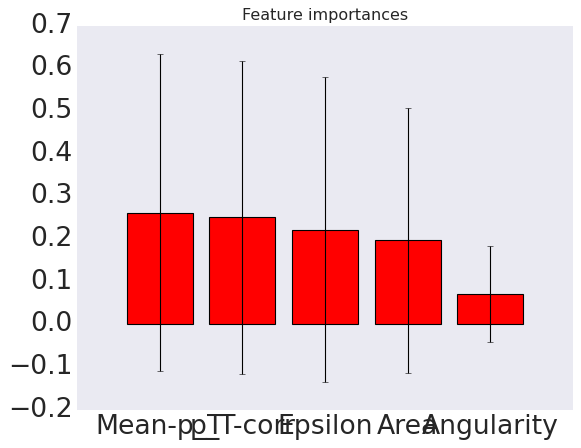

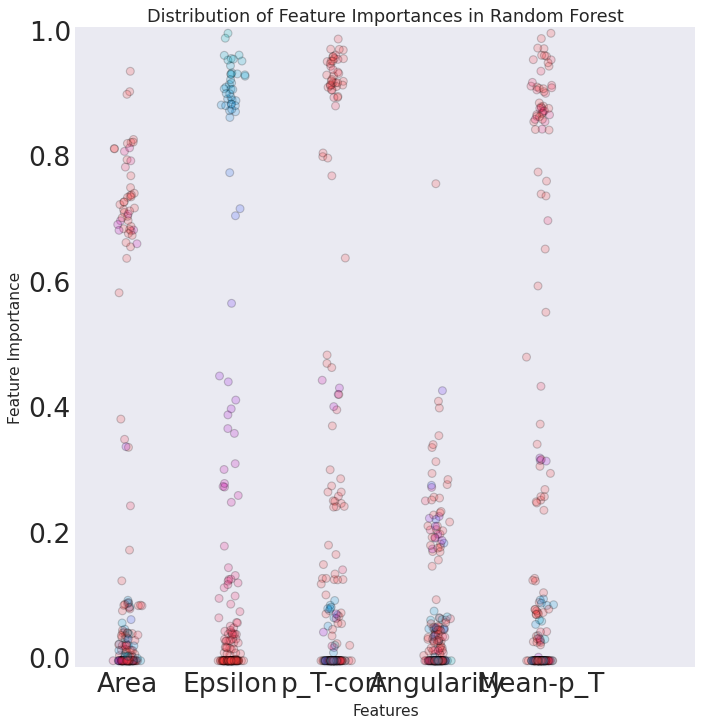

In [21]:
doModelEvaluation(X, Y, Xtest, Ytest, rfModel, rad, ptm, feat_imp)